In [1]:
import numpy as np
from scipy.stats import binom,norm,uniform
import matplotlib.pyplot as plt

# Problemas de distribución de probabilidad

## Distribución binomial

En teoría de la probabilidad y estadística, la distribución binomial es la distribución de probabilidad discreta que da sólo dos resultados posibles en un experimento; por ejemplo, al lanzar una moneda, puede salir cara o cruz.

In [ ]:
# Definir todas las funciones de probabilidad relacionadas con esta distribución.

def dbinom(x, size, prob = 0.5):
    """
    Calcula la estimación puntual de la distribución binomial.
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calcula el acumulado de la distribución binomial.
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calcula la función cuantil a partir de la distribución binomial.
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Genera variables aleatorias a partir de la distribución binomial.
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [17]:
# Distribución binomial(10, 0.2), dónde n = 10 es el número de ensayos y p = 0.2 es la probabilidad de éxito en un solo ensayo
np.random.seed(42)

print(f"Probabilidad de que una Binomial(10, 0.2) tome el valor 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probabilidad de que una Binomial(10, 0.2) tome un valor menor que 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"¿Qué valor de una Binomial(10, 0.2) tiene una probabilidad acumulada de 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generar 2000 valores aleatorios de una distribución Binomial(10, 0.2): {rbinom(2000, size = 10, prob = 0.2)}")

Probabilidad de que una Binomial(10, 0.2) tome el valor 2: 0.30198988800000004
Probabilidad de que una Binomial(10, 0.2) tome un valor menor que 2: 0.6777995263999997
¿Qué valor de una Binomial(10, 0.2) tiene una probabilidad acumulada de 0.9? 4.0
Generar 2000 valores aleatorios de una distribución Binomial(10, 0.2): [1 4 3 ... 0 0 1]


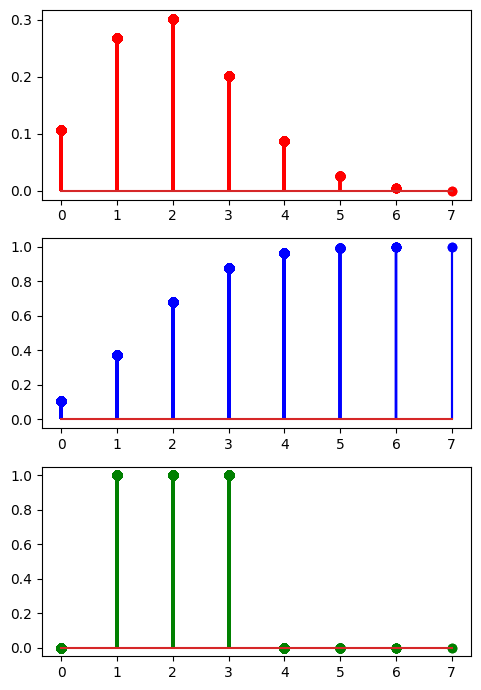

In [ ]:
np.random.seed(42)

size = 10
prob = 0.2
#Conjunto de valores aleatorios que siguen una Binomial(10,0.2)
data = rbinom(2000, size = 10, prob = 0.2)
#Conjunto de probabilidades para los cuales la distribucion toma el valor data
pmf = dbinom(data, size = size, prob = prob) 
#Conjunto de probabilidades para los cuales la distribucion toma al menos el valor data
cdf = pbinom(data, size = size, prob = prob)
#Cojunto de valores que generan un percetil de probabilidad igual a pmf
ppf = qbinom(pmf, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))
# Funcion de distribución
axis[0].stem(data, pmf, "r-")
#Función de distribución acumulada
axis[1].stem(data, cdf, "b-")

axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Distribución normal
La distribución normal se caracteriza por ser simétrica perfecta (distribución antes media=distribución después media) y presentar forma de campana. Como consecuencia, su media=mediana=moda y cumple la **Regla 68-95-99.7**: 
 
    - 68 % de los datos cae dentro de ±1 desviación estándar.
    - 95 % dentro de ±2 desviaciones.
    - 99.7 % dentro de ±3 desviaciones. 

Un ejemplo de esta distribución pueden ser la altura de las personas adultas o las notas de un examen estandarizado (tipo selectividad).

In [ ]:
# Funciones de probabilidad.

def prob_norm(x, med, desv):
    ''' 
    Devuelve la probabilidad de ocurrencia de un valor determinado
    '''
    return norm.pdf(x, loc=med, scale=desv)

def ac_prob_norm(x, med, desv):
    ''' 
    Devuelve la probabilidad acumulada de ocurrencia de un valor determinado
    '''
    return norm.cdf(x, loc=med, scale=desv)

def ac_valor_norm(prob_ac, med, desv):
    ''' 
    Devuelve un valor determinado dado una probabilidad acumulada de la distribución
    '''
    return norm.ppf(prob_ac, loc=med, scale=desv)

def valor_norm(n, med, desv):
    ''' 
    Genera n valores aleatorios que siguen una distribución N(med,desv)
    '''
    return norm.rvs(loc=med, scale=desv, size=n)

In [81]:
# Distribución norma(170, 20), dónde la estatura media es de 170cm y la desviación tipica es de 20cm
np.random.seed(42)

print(f"Probabilidad de que un individuo mida 180 cm: {round(prob_norm(180, 170, 20)*100, 2)} %")
print(f"Probabilidad de que un individuo mida menos de 160 cm: {round(ac_prob_norm(160, 170, 20)*100, 2)} %")
print(f"¿Qué altura máxima debe tener un individuo para situarse en el percentil 20? {round(ac_valor_norm(0.2, 170, 20),2)} cm")
print(f"Generar 2000 valores aleatorios de una distribución de estaturas N(170, 20): {valor_norm(2000, 170, 20)}")

Probabilidad de que un individuo mida 180 cm: 1.76 %
Probabilidad de que un individuo mida menos de 160 cm: 30.85 %
¿Qué altura máxima debe tener un individuo para situarse en el percentil 20? 153.17 cm
Generar 2000 valores aleatorios de una distribución de estaturas N(170, 20): [179.93428306 167.23471398 182.95377076 ... 152.36250698 166.73866072
 155.1019471 ]


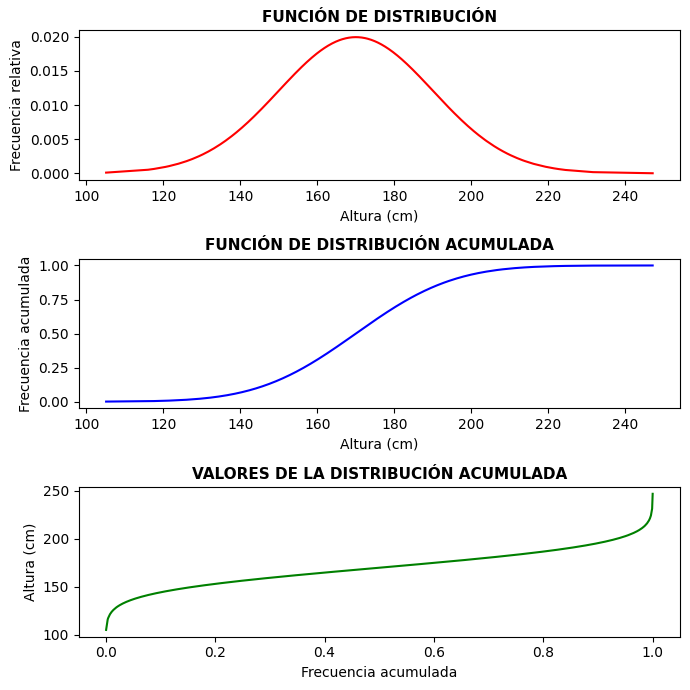

In [108]:
#Representaciones de las funciones de probabilidad
np.random.seed(42)

##Valores aleatorios
data=valor_norm(1000,170,20)
data.sort() #Ordenamos los valores

##Funcion de distribución unitaria
dist=prob_norm(data,170,20)

##Función de distribución acumulada
ac_dist=ac_prob_norm(data,170,20)

##Valores de distribución acumulada
valores=ac_valor_norm(ac_dist, 170, 20)

##Configuración del gráfico
fig, axis = plt.subplots(3, 1, figsize = (7, 7))
###Funcion de distribución
axis[0].plot(data, dist, "r-")
axis[0].set_title("Función de distribución".upper(), size=11, fontweight="bold")
axis[0].set_xlabel("Altura (cm)")
axis[0].set_ylabel("Frecuencia relativa")
###Función de distribución acumulada
axis[1].plot(data, ac_dist, "b-")
axis[1].set_title("Función de distribución acumulada".upper(), size=11, fontweight="bold")
axis[1].set_xlabel("Altura (cm)")
axis[1].set_ylabel("Frecuencia acumulada")
###Valores de distribución acumulada
axis[2].plot(ac_dist, valores, "g-")
axis[2].set_title("Valores de la distribución acumulada".upper(), size=11, fontweight="bold")
axis[2].set_xlabel("Frecuencia acumulada")
axis[2].set_ylabel("Altura (cm)")

plt.tight_layout()
plt.show()

## Distribución uniforme

La distribución uniforme se caracteriza por:

- Todos los valores tienen la misma probabilidad dentro de un intervalo.

- Forma del gráfico: un rectángulo plano (no hay picos ni valles).

- Dos parámetros principales: valor mínimo (a) y máximo (b)

- Simetría: es perfectamente simétrica alrededor de la media.

- Media: $\frac{a+b}{2}$

- Varianza: $\frac{(b-a)^2}{12}$

- Funcion de densidad: $f(x)=\frac{1}{b-a}$

- Probabilidad de un intervalo: La probabilidad de un suceso dentro del intervalo $(x_{1},x_{2})$ se calcula como la longitud del intervalo dividida por la longitud total: $P(x_{1}\le X\le x_{2})=\frac{x_{2}-x_{1}}{b-a}$

**Ejemplo:** Número de asiento asignado al azar → todos los asientos tienen la misma probabilidad.

In [ ]:
#Funciones de probabilidad
def prob_unif(x, minim, escala):
    ''' 
    Devuelve la probabilidad de ocurrencia de un valor determinado
    '''
    return uniform.pdf(x, loc=minim, scale=escala) #Coreccion sobre casos posibles (scale)

def ac_prob_unif(x, minim, escala):
    ''' 
    Devuelve la probabilidad acumulada de ocurrencia de un valor determinado
    '''
    return uniform.cdf(x+1, loc=minim, scale=escala) #Correccion añadimos 1 a valor x objetivo

def ac_valor_unif(prob_ac, minim, escala):
    ''' 
    Devuelve un valor determinado dado una probabilidad acumulada de la distribución
    '''
    return uniform.ppf(prob_ac, loc=minim, scale=escala)

def valor_unif(n, minim, escala):
    ''' 
    Genera n valores aleatorios que siguen una distribución N(minnim,escala)
    '''
    return [round(x) for x in uniform.rvs(loc=minim, scale=escala, size=n)]

In [46]:
# Distribución unforme(1, 30), dónde la escala de asientos posibles va desde 1 a 30

print(f"Probabilidad de que el asiento asignado sea el 7: {round(prob_unif(7, 1, 30)*100, 2)} %")
print(f"Probabilidad de que el asiento se encuentre entre los 12 primeros: {round(ac_prob_unif(12, 1, 30)*100, 2)} %")
print(f"¿Qué asiento debe ser asignado para situarse en el percentil 43,33? nº {int(round(ac_valor_unif(0.433333333, 1, 30)))}")
print(f"Generar 10 asientos aleatorios de una distribución U(1, 30): {valor_unif(10, 1, 30)}")

Probabilidad de que el asiento asignado sea el 7: 3.33 %
Probabilidad de que el asiento se encuentre entre los 12 primeros: 40.0 %
¿Qué asiento debe ser asignado para situarse en el percentil 43,33? nº 14
Generar 10 asientos aleatorios de una distribución U(1, 30): [21, 4, 20, 31, 27, 28, 15, 10, 1, 20]


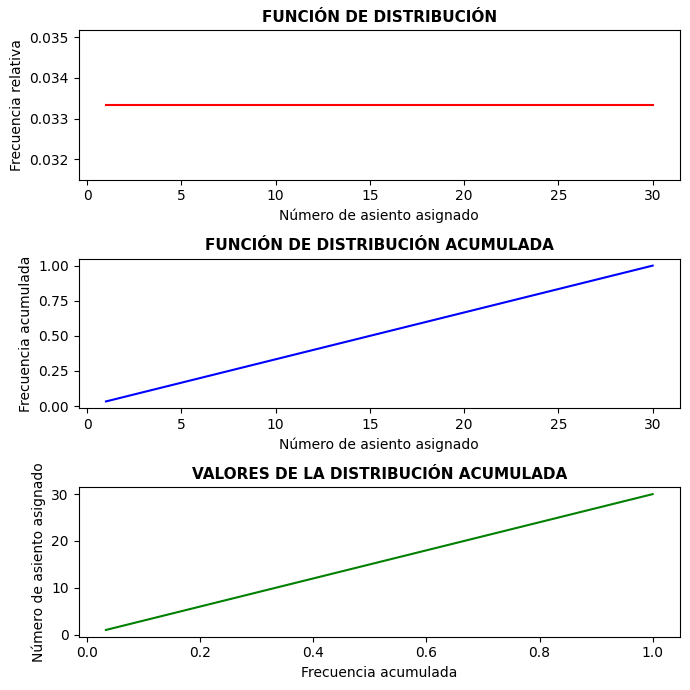

In [66]:
#Representaciones de las funciones de probabilidad
np.random.seed(42)

##Valores posibles
data=np.linspace(1,30,30)

##Funcion de distribución unitaria
dist=prob_unif(data,1,30)

##Función de distribución acumulada
ac_dist=ac_prob_unif(data,1,30)

##Valores de distribución acumulada
valores=ac_valor_unif(ac_dist, 0, 30)

##Configuración del gráfico
fig, axis = plt.subplots(3, 1, figsize = (7, 7))
###Funcion de distribución
axis[0].plot(data, dist, "r-")
axis[0].set_title("Función de distribución".upper(), size=11, fontweight="bold")
axis[0].set_xlabel("Número de asiento asignado")
axis[0].set_ylabel("Frecuencia relativa")
###Función de distribución acumulada
axis[1].plot(data, ac_dist, "b-")
axis[1].set_title("Función de distribución acumulada".upper(), size=11, fontweight="bold")
axis[1].set_xlabel("Número de asiento asignado")
axis[1].set_ylabel("Frecuencia acumulada")
###Valores de distribución acumulada
axis[2].plot(ac_dist, valores, "g-")
axis[2].set_title("Valores de la distribución acumulada".upper(), size=11, fontweight="bold")
axis[2].set_xlabel("Frecuencia acumulada")
axis[2].set_ylabel("Número de asiento asignado")

plt.tight_layout()
plt.show()